In [1]:
# stave.py
# G. Cowan / RHUL Physics / December 2020
# Computes Student's t average, with the number of degrees of
# freedom nu related to the relative uncertainty r in the
# standard deviations of the measurements, nu = 1/(2*r**2), see
# G. Cowan, Eur. Phys. J. C (2019) 79 :133, arXiv:1809.05778.

import numpy as np
import scipy.stats as stats
from scipy.stats import truncexpon
from scipy.stats import truncnorm
from iminuit import Minuit
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 14

In [2]:
mu = 10.                                  # initial value for fit
y = np.array([8., 9., 10., 11., 12.])     # measured values
s = np.array([1., 1., 1., 1., 1.])        # estimates of std. dev
v = s**2                                  # estimates of variances
r = np.array([0.2, 0.2, 0.2, 0.2, 0.2])   # relative errors on errors

In [3]:
def negLogL(mu):
    lnf = -0.5*(1. + 1./(2.*r**2))*np.log(1. + 2.*(r*(y-mu))**2/v)
    return -np.sum(lnf)

In [4]:
# Initialize Minuit and set up fit:
#     initial parameter values are guesses,
#     error values set initial step size in search algorithm,
#     limit_param to set limits on parameters,
#     fix_param=True to fix a parameter,
#     errordef=0.5 means errors correspond to logL = logLmax - 0.5,
#     pedantic=False to turn off verbose messages.
parin     = np.array([mu])          # initial values
parname = ['mu']
parstep = np.array([0.5])           # initial setp sizes
parfix  = [False]                   # change these to fix/free parameters
parlim  = [(None, None)]
m = Minuit.from_array_func(negLogL, parin, parstep, name=parname,
    limit=parlim, fix=parfix, errordef=0.5, pedantic=False)

In [5]:
# do the fit, extract results
m.migrad()                                             # minimize -logL
MLE = m.np_values()                                    # max-likelihood estimates
sigmaMLE = m.np_errors()                               # standard deviations
cov = m.np_matrix(skip_fixed=True)                     # covariance matrix
rho = m.np_matrix(skip_fixed=True, correlation=True)   # correlation coeffs.
npar = len(m.np_values())
nfreepar = len(cov[0])

npar = len(m.np_values())
print(r'par index, name, estimate, standard deviation:')
for i in range(npar):
    if not(m.is_fixed(i)):
        print("{:4d}".format(i), "{:<10s}".format(m.parameters[i]), " = ",
         "{:.6f}".format(MLE[i]), " +/- ", "{:.6f}".format(sigmaMLE[i]))

print()
print(r'free par indices, covariance, correlation coeff.:')
for i in range(nfreepar):
    for j in range(nfreepar):
        print(i, j, "{:.6f}".format(cov[i,j]), "{:.6f}".format(rho[i,j]))

par index, name, estimate, standard deviation:
   0 mu          =  10.489128  +/-  0.641382

free par indices, covariance, correlation coeff.:
0 0 0.411371 1.000000


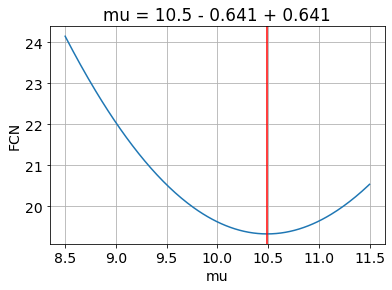

In [6]:
# Make scan of -lnL
if not(m.is_fixed('mu')):
    plt.figure()
    m.draw_mnprofile('mu', band=False, bound=(8.5, 11.5), bins=200)
    plt.show()